Kaggle Dataset: Car Price Prediction Multiple Linear Regression

https://www.kaggle.com/datasets/hellbuoy/car-price-prediction

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import kagglehub as kh

In [2]:
# load data
path = kh.dataset_download("hellbuoy/car-price-prediction")
print("Path to dataset files:", path)

data = pd.read_csv(path + "\CarPrice_Assignment.csv")
print(data.shape)

X = data.iloc[:, :25]
y = data.iloc[:, [25]]
print(X.head(5))

<>:5: SyntaxWarning: invalid escape sequence '\C'
<>:5: SyntaxWarning: invalid escape sequence '\C'
C:\Users\sunsh\AppData\Local\Temp\ipykernel_29664\897493504.py:5: SyntaxWarning: invalid escape sequence '\C'
  data = pd.read_csv(path + "\CarPrice_Assignment.csv")


Path to dataset files: C:\Users\sunsh\.cache\kagglehub\datasets\hellbuoy\car-price-prediction\versions\1
(205, 26)
   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  cylindernumber  \
0  convertible        rwd          front       88.6  ...            four   
1  convertible        rwd          front       88.6  ...            four   
2    hatchback        rwd          front       94.5  ...             six   
3        sedan        fwd          front       99.8  ...            four   
4        sedan    

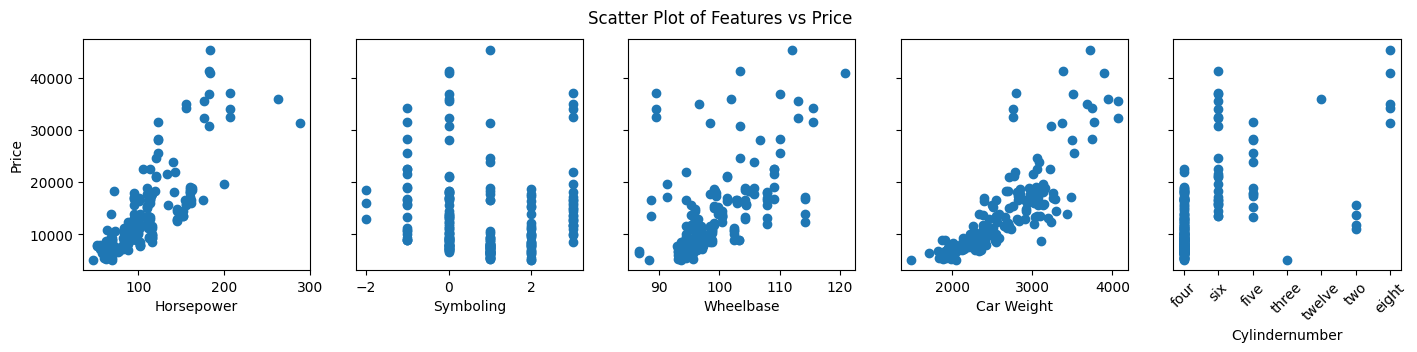

In [3]:
# plot car prices for some selected features
fig,ax=plt.subplots(1, 5, figsize=(17, 3), sharey=True)
ax[0].scatter(X['horsepower'],y['price'])
ax[0].set_xlabel('Horsepower')
ax[1].scatter(X['symboling'],y['price'])
ax[1].set_xlabel('Symboling')
ax[2].scatter(X['wheelbase'],y['price'])
ax[2].set_xlabel('Wheelbase')
ax[3].scatter(X['curbweight'],y['price'])
ax[3].set_xlabel('Car Weight')
ax[4].scatter(X['cylindernumber'],y['price'])
ax[4].set_xlabel('Cylindernumber')
ax[4].tick_params(axis='x', rotation=45)

ax[0].set_ylabel("Price")
fig.suptitle('Scatter Plot of Features vs Price')
plt.show()

In [4]:
# drop columns that are not needed for training
X = X.drop(columns=['car_ID', 'CarName', 'fuelsystem'])

In [5]:
# one-hot encoding for categorical columns
X = pd.get_dummies(X, columns=['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber'])
print(X.shape)

(205, 49)


In [6]:
# Split the data into training and testing sets
train_size = int(0.9 * len(X))

X_train = X[:train_size]
y_train = y[:train_size]

X_test = X[train_size:]
y_test = y[train_size:]

In [7]:
# feature normalization
scaler = StandardScaler()

features_to_normalize = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']
X_train[features_to_normalize] = scaler.fit_transform(X_train[features_to_normalize])
print(X.head(5))

X_test[features_to_normalize] = scaler.transform(X_test[features_to_normalize])

   wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0       88.6      168.8      64.1       48.8        2548         130   
1       88.6      168.8      64.1       48.8        2548         130   
2       94.5      171.2      65.5       52.4        2823         152   
3       99.8      176.6      66.2       54.3        2337         109   
4       99.4      176.6      66.4       54.3        2824         136   

   boreratio  stroke  compressionratio  horsepower  ...  enginetype_ohcf  \
0       3.47    2.68               9.0         111  ...            False   
1       3.47    2.68               9.0         111  ...            False   
2       2.68    3.47               9.0         154  ...            False   
3       3.19    3.40              10.0         102  ...            False   
4       3.19    3.40               8.0         115  ...            False   

   enginetype_ohcv  enginetype_rotor  cylindernumber_eight  \
0            False             False            

C:\Users\sunsh\AppData\Local\Temp\ipykernel_29664\2008855790.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[features_to_normalize] = scaler.fit_transform(X_train[features_to_normalize])
C:\Users\sunsh\AppData\Local\Temp\ipykernel_29664\2008855790.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[features_to_normalize] = scaler.transform(X_test[features_to_normalize])


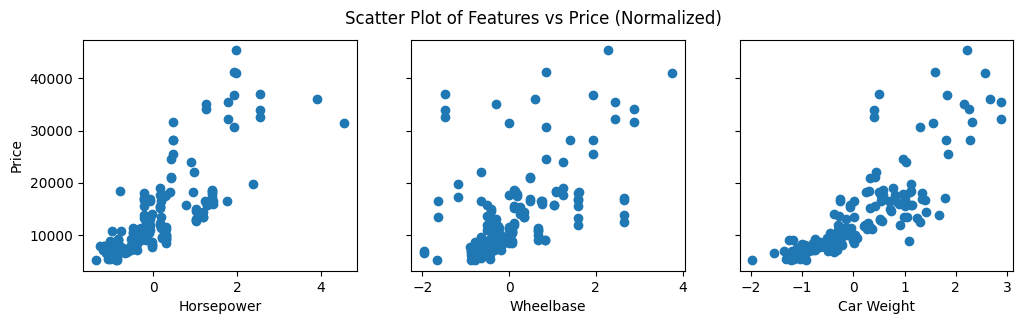

In [8]:
# plot car prices for some normalized features
fig,ax=plt.subplots(1, 3, figsize=(12, 3), sharey=True)
ax[0].scatter(X_train['horsepower'],y_train['price'])
ax[0].set_xlabel('Horsepower')
ax[1].scatter(X_train['wheelbase'],y_train['price'])
ax[1].set_xlabel('Wheelbase')
ax[2].scatter(X_train['curbweight'],y_train['price'])
ax[2].set_xlabel('Car Weight')

ax[0].set_ylabel("Price")
fig.suptitle('Scatter Plot of Features vs Price (Normalized)')
plt.show()

In [9]:
def norm_plot(ax, data):
    scale = (data.max() - data.min())*0.2
    x = np.linspace(data.min() - scale, data.max() + scale, 50)
    _,bins, _ = ax.hist(data, x, color="xkcd:azure")
    
    mu = data.mean() 
    std = data.std() 
    dist = norm.pdf(bins, loc=mu, scale = std)
    
    axr = ax.twinx()
    axr.plot(bins,dist, color = "orangered", lw=2)
    axr.set_ylim(bottom=0)
    axr.axis('off')

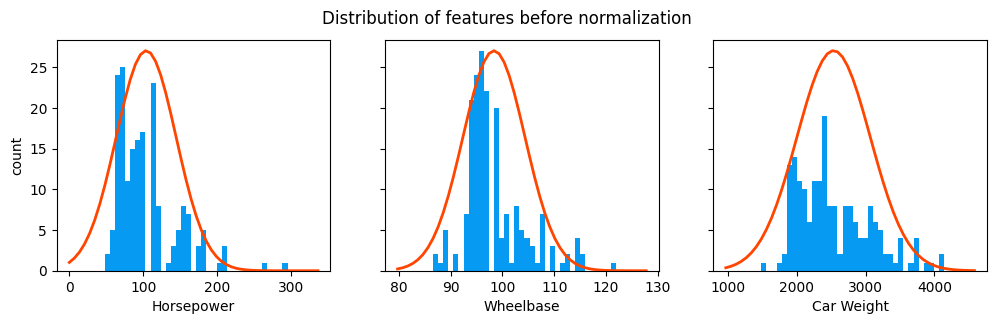

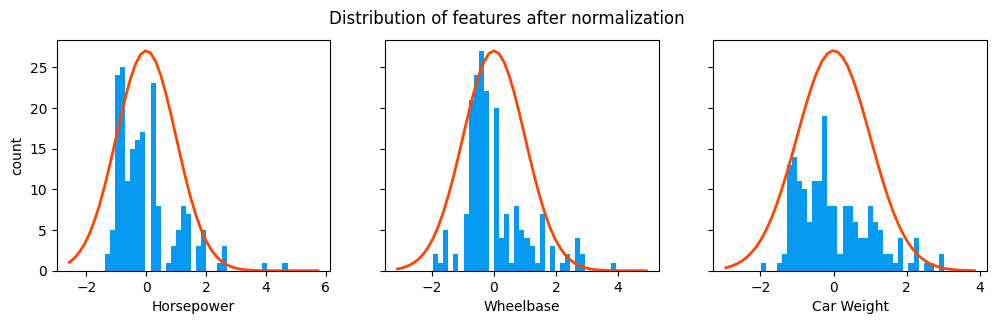

In [10]:
# Compare the distribution of selected features before and after normalization
fig,ax=plt.subplots(1, 3, figsize=(12, 3), sharey=True)
norm_plot(ax[0], X[:train_size]['horsepower'] )
ax[0].set_xlabel('Horsepower')
norm_plot(ax[1], X[:train_size]['wheelbase'])
ax[1].set_xlabel('Wheelbase')
norm_plot(ax[2], X[:train_size]['curbweight'])
ax[2].set_xlabel('Car Weight')

ax[0].set_ylabel("count")
fig.suptitle("Distribution of features before normalization")

plt.show()

fig,ax=plt.subplots(1, 3, figsize=(12, 3), sharey=True)
norm_plot(ax[0], X_train['horsepower'])
ax[0].set_xlabel('Horsepower')
norm_plot(ax[1], X_train['wheelbase'])
ax[1].set_xlabel('Wheelbase')
norm_plot(ax[2], X_train['curbweight'])
ax[2].set_xlabel('Car Weight')

ax[0].set_ylabel("count"); 
fig.suptitle("Distribution of features after normalization")

plt.show()

In [11]:
def gradient_descent(X, y, lr=0.01, n_iterations=1000, verbose=False):
    """
    Performs gradient descent for linear regression.

    Parameters:
    - X : pandas DataFrame or numpy array, shape (n_samples, n_features)
    - y : pandas Series, DataFrame, or numpy array, shape (n_samples,)
    - lr : learning rate (float)
    - n_iterations : number of iterations (int)
    - verbose : if True, prints loss every 100 iterations

    Returns:
    - weights : numpy array, shape (n_features,)
    - bias : float
    - losses : list of loss at each iteration
    """

    # Convert to numpy arrays if they are pandas objects
    if isinstance(X, (pd.DataFrame, pd.Series)):
        X = X.values.astype(float)
    if isinstance(y, (pd.DataFrame, pd.Series)):
        y = y.values.flatten().astype(float)  # flatten in case y is a (n,1) shaped dataframe

    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    losses = []

    for i in range(n_iterations):
        # Predict
        y_pred = np.dot(X, weights) + bias

        # Compute loss (mean squared error)
        loss = np.mean((y_pred - y) ** 2)
        losses.append(loss)

        # Compute gradients
        dw = (2/n_samples) * np.dot(X.T, (y_pred - y))
        db = (2/n_samples) * np.sum(y_pred - y)

        # Update weights
        weights -= lr * dw
        bias -= lr * db

        if verbose and i % 100 == 0:
            print(f"Iteration {i}: Loss = {loss:.4f}")

    return weights, bias, losses

In [12]:
# Configure hyperparameters for gradient descent
lr = 0.01
n_iterations = 10000

# Perform gradient descent
weights, bias, losses = gradient_descent(X_train, y_train, lr=lr, n_iterations=n_iterations, verbose=True)

Iteration 0: Loss = 240812188.1559
Iteration 100: Loss = 11010405.7483
Iteration 200: Loss = 9052103.0679
Iteration 300: Loss = 8149376.7158
Iteration 400: Loss = 7535853.9795
Iteration 500: Loss = 7067470.5093
Iteration 600: Loss = 6693892.6938
Iteration 700: Loss = 6388608.1982
Iteration 800: Loss = 6134763.2276
Iteration 900: Loss = 5920716.5568
Iteration 1000: Loss = 5738070.2638
Iteration 1100: Loss = 5580594.9181
Iteration 1200: Loss = 5443572.5281
Iteration 1300: Loss = 5323368.7048
Iteration 1400: Loss = 5217142.9256
Iteration 1500: Loss = 5122646.7626
Iteration 1600: Loss = 5038080.2260
Iteration 1700: Loss = 4961987.5603
Iteration 1800: Loss = 4893180.4197
Iteration 1900: Loss = 4830680.4155
Iteration 2000: Loss = 4773675.5995
Iteration 2100: Loss = 4721487.1284
Iteration 2200: Loss = 4673543.4678
Iteration 2300: Loss = 4629360.2455
Iteration 2400: Loss = 4588524.3861
Iteration 2500: Loss = 4550681.5217
Iteration 2600: Loss = 4515525.9308
Iteration 2700: Loss = 4482792.4445
I

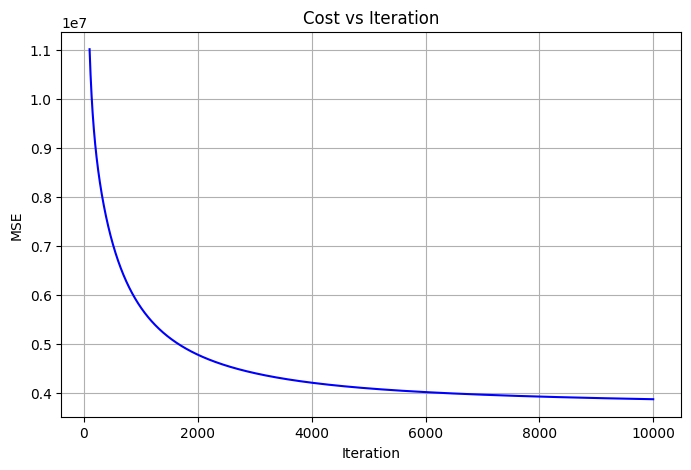

In [13]:
plt.figure(figsize=(8, 5))
plt.plot(range(100, len(losses)), losses[100:], color='blue')
plt.title('Cost vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

In [14]:
# Predict on the test set
y_pred = np.dot(X_test.values.astype(float), weights) + bias

# Calculate MSE loss on the test set
mse_test = np.mean((y_pred - y_test.values.flatten().astype(float)) ** 2)
print(f"Test MSE: {mse_test:.4f}")

Test MSE: 6464028.7494


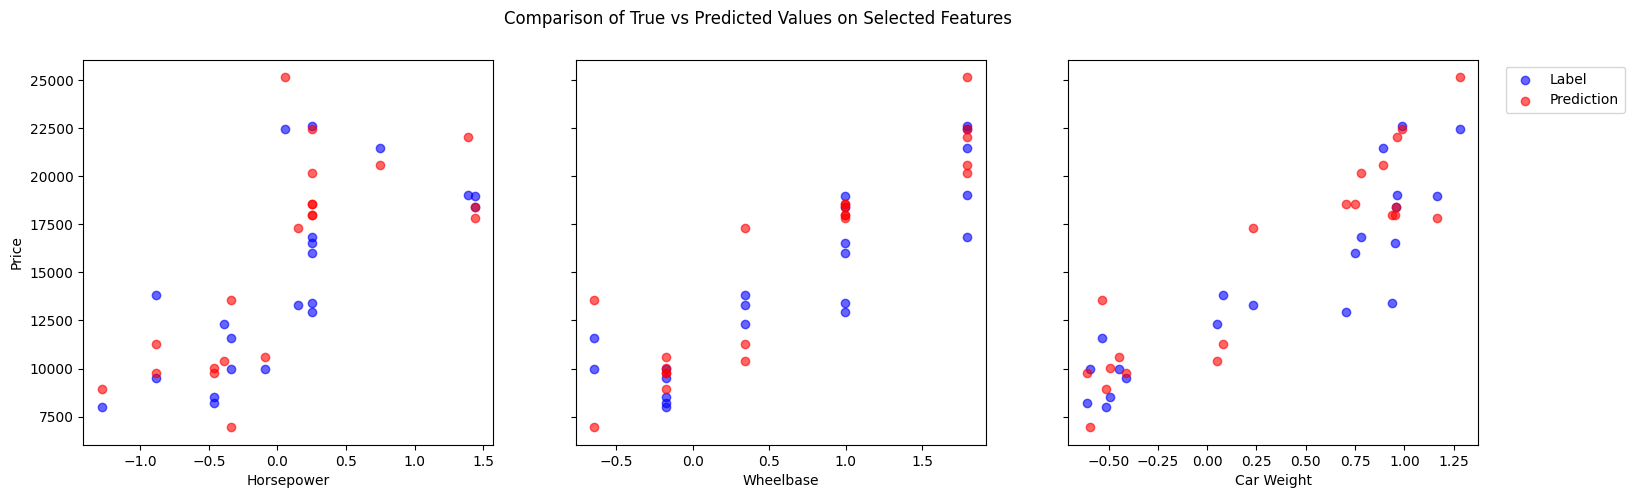

In [15]:
fig,ax=plt.subplots(1, 3, figsize=(18, 5), sharey=True)

ax[0].scatter(X_test['horsepower'], y_test, color='blue', label='Label', alpha=0.6)
ax[0].scatter(X_test['horsepower'], y_pred, color='red', label='Prediction', alpha=0.6)
ax[0].set_xlabel('Horsepower')

ax[1].scatter(X_test['wheelbase'], y_test, color='blue', label='Label', alpha=0.6)
ax[1].scatter(X_test['wheelbase'], y_pred, color='red', label='Prediction', alpha=0.6)
ax[1].set_xlabel('Wheelbase')

ax[2].scatter(X_test['curbweight'], y_test, color='blue', label='Label', alpha=0.6)
ax[2].scatter(X_test['curbweight'], y_pred, color='red', label='Prediction', alpha=0.6)
ax[2].set_xlabel('Car Weight')

fig.suptitle('Comparison of True vs Predicted Values on Selected Features')
ax[0].set_ylabel("Price")
ax[2].legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()